In [1]:
from spaces import *
import numpy as np
from model.player import Player, distance

In [2]:
statespace = Space(name="Alice and Bob's Tagspace")

In [3]:
statespace.append_dimension("Alice", Player)
statespace.append_dimension("Bob", Player)

In [4]:
statespace.dimensions

['Alice', 'Bob']

In [5]:
statespace.Alice

In [6]:
state = statespace.point({"Alice":(0,0),"Bob":(1,1)})

In [7]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(0, 0, 1, 1)

In [8]:
for dim in state.space.dimensions:
    print(dim)
    print(getattr(state.space,dim))

Alice
Bob


In [9]:
traj = Trajectory(state)

In [10]:
traj.space.name

"Alice and Bob's Tagspace"

In [11]:
for p in traj.points:
    print((p.Alice.x,p.Alice.y))
    print((p.Bob.x,p.Bob.y))

(0, 0)
(1, 1)


In [12]:
def tag_dynamics(point):
    
    point.Alice.chase(point.Bob)
    point.Bob.evade(point.Alice)

    return point

In [13]:
dyn = Dynamics(statespace, Block(statespace, statespace, tag_dynamics, description="Alice Chases Bob"))
traj.set_dynamics(dyn)

In [14]:
traj.dynamics.step

<function __main__.tag_dynamics(point)>

In [15]:
traj.points

In [16]:
traj.apply_dynamics(10)

In [17]:
traj.points

In [18]:
import matplotlib.pyplot as plt

In [19]:
t = range(traj.length)
alice_pos = [(p.Alice.x,p.Alice.y) for p in traj.points ]
bob_pos = [(p.Bob.x,p.Bob.y) for p in traj.points ]

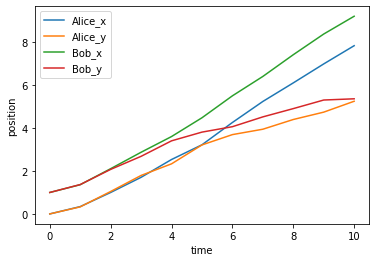

In [20]:
plt.plot(t,alice_pos, t, bob_pos)
plt.xlabel("time")
plt.ylabel("position")
plt.legend(["Alice_x", "Alice_y","Bob_x","Bob_y"])

In [21]:
state = traj.points[-1]

In [22]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(7.845400062879723, 5.254435860393991, 9.219173750161978, 5.368868975131195)

In [23]:
statespace.metrics

[]

In [24]:
dist = Metric(lambda point: distance(point.Alice, point.Bob), description="2d Euclidean Distance")
statespace.append_metric("distance", dist)

In [25]:
statespace.metrics

['distance']

In [26]:
statespace.distance.eval(state)

1.3785314946048717

In [27]:
distances = [ traj.space.distance.eval(p) for p in traj.points ]

Text(0.5, 1.0, 'Distance Between Alice and Bob')

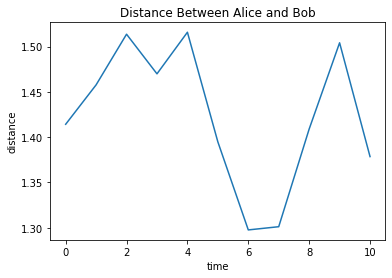

In [28]:
plt.plot(t, distances)
plt.xlabel("time")
plt.ylabel("distance")
plt.title("Distance Between Alice and Bob")

In [29]:
def unit_vector(point):
    
    s = point.space
    d = point.space.distance.eval(point)

    if d < .000001:
        return (0,0)
    else:
        dx = point.Bob.x-point.Alice.x
        dy = point.Bob.y-point.Alice.y
    
        return [dx/d,dy/d]


dire = Metric(unit_vector, description="Unit Vector Alice to Bob")

In [30]:
statespace.append_metric("direction", dire)

In [31]:
directions = np.array([ traj.space.direction.eval(p) for p in traj.points ])

In [32]:
directions

array([[0.70710678, 0.70710678],
       [0.70066564, 0.71348977],
       [0.73251171, 0.68075443],
       [0.79504014, 0.60655682],
       [0.70643418, 0.70777875],
       [0.90356646, 0.42844795],
       [0.95867796, 0.28449354],
       [0.8968706 , 0.44229303],
       [0.93273761, 0.36055588],
       [0.92670435, 0.37579123],
       [0.99654864, 0.08301088]])

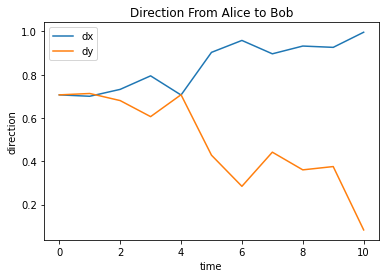

In [33]:
plt.plot(directions)
plt.xlabel("time")
plt.ylabel("direction")
plt.title("Direction From Alice to Bob")
plt.legend(["dx","dy"])

Text(0.5, 1.0, 'Direction From Alice to Bob')

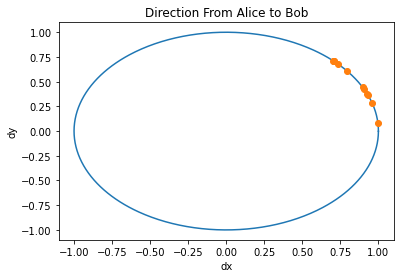

In [34]:
xc=[]
yc=[]

for theta in np.arange(0,2*np.pi,.01):
    xc.append(np.cos(theta))
    yc.append(np.sin(theta))

plt.plot(xc,yc)
plt.plot(directions.T[0], directions.T[1], 'o')
plt.xlabel("dx")
plt.ylabel("dy")
plt.title("Direction From Alice to Bob")